In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
df1=pd.read_csv("train.csv")

In [3]:
print(df1.shape,df1.index,df1.columns)

(6368, 15) RangeIndex(start=0, stop=6368, step=1) Index(['Product_id', 'Stall_no', 'instock_date', 'Market_Category',
       'Customer_name', 'Loyalty_customer', 'Product_Category', 'Grade',
       'Demand', 'Discount_avail', 'charges_1', 'charges_2 (%)',
       'Minimum_price', 'Maximum_price', 'Selling_Price'],
      dtype='object')


In [4]:
df1.head(10)

Product_id  Stall_no             instock_date  Market_Category  \
0  BRAE2NF6JA5GUEXG      37.0  2015-08-22 18:36:12.000                2   
1  TUNE8SFB6RJN2HSD      38.0  2016-03-27 21:19:13.000               24   
2  BRAEAR7WZPQGPBZU       9.0  2015-08-18 19:25:22.000              447   
3  WATDZ2ZQ8JPDHCTJ      50.0  2016-03-28 21:53:01.000               23   
4  JWSEBUKYQPMBZ3RK       7.0  2016-03-29 22:58:53.000               63   
5  SHIECAYW3VZWGZGX      23.0  2015-09-25 16:31:46.000              162   
6  SHOE4FZGGTE7HJXN      33.0  2014-12-08 12:25:52.000              462   
7  SHOE6QGAYFFMBWG6       4.0  2015-09-22 14:29:06.000               23   
8  KRTEBSMKCGFESHYX      26.0  2016-03-28 21:48:01.000              156   
9  BRAE3P8Y8UVRY43K       5.0  2015-08-19 22:16:52.000              275   

  Customer_name Loyalty_customer Product_Category  Grade  Demand  \
0      Lillyann              Yes          Fashion      1      68   
1         Klynn              Yes          Fashion      0      51   
2         Ridge              Yes       Child_care      0      10   
3         Abran              Yes      Educational      2      48   
4        Dustyn              Yes           Repair      1      35   
5        Brilee              No        Technology      1      49   
6           Zoe              No         Cosmetics      3      57   
7          Koby              Yes      Educational      1      67   
8       Tiffani              Yes       Child_care      0      53   
9         Nigel              Yes       Child_care      0      84   

   Discount_avail  charges_1  charges_2 (%)  Minimum_price  Maximum_price  \
0             0.0      376.0           11.0         2983.0         4713.0   
1             0.0      397.0           12.0         7495.0        10352.0   
2             0.0      250.0            9.0         5752.0         7309.0   
3             0.0      144.0           13.0         5090.0        20814.0   
4             1.0      211.0            4.0         2430.0         9261.0   
5             0.0      633.0            6.0         3959.0         6104.0   
6             0.0      263.0           13.0         2006.0         5257.0   
7             0.0      104.0           15.0         3596.0         5921.0   
8             0.0      310.0            6.0         6965.0        10194.0   
9             1.0      321.0            8.0         1103.0         5430.0   

   Selling_Price  
0    4185.947700  
1    9271.490256  
2    6785.701362  
3   13028.917824  
4     906.553935  
5    5631.247872  
6    3874.264992  
7    4820.943600  
8    8837.724240  
9     530.761862

In [5]:
 df1.isnull().sum()
    

Product_id            0
Stall_no              5
instock_date          0
Market_Category       0
Customer_name       211
Loyalty_customer      0
Product_Category      0
Grade                 0
Demand                0
Discount_avail       38
charges_1           198
charges_2 (%)       205
Minimum_price        38
Maximum_price       343
Selling_Price        41
dtype: int64

In [6]:
df1[df1['Selling_Price'].isnull()&df1['Minimum_price']&df1['Maximum_price']].shape

(39, 15)

In [7]:
df1[df1['Selling_Price'].isnull()&df1['Minimum_price']].shape

(41, 15)

In [8]:
df1[df1['Selling_Price'].isnull()&df1['Maximum_price'].isnull()].shape

(2, 15)

In [9]:
df1[df1['Loyalty_customer']=="Yes"].shape[0]/df1.shape[0]

0.6103957286432161

In [10]:
df1['Market_Category'].value_counts()


23     326
452    323
358    271
55     249
3      239
      ... 
206      1
210      1
214      1
18       1
217      1
Name: Market_Category, Length: 248, dtype: int64

In [11]:
df1['Discount_avail'].value_counts()

0.0    5441
1.0     889
Name: Discount_avail, dtype: int64

In [12]:
data=df1[['Product_id', 'Stall_no', 'Market_Category','Loyalty_customer', 'Product_Category', 'Grade',
       'Demand', 'Discount_avail', 'charges_1', 'charges_2 (%)',
       'Minimum_price', 'Maximum_price', 'Selling_Price']]

In [13]:
data

Product_id  Stall_no  Market_Category Loyalty_customer  \
0     BRAE2NF6JA5GUEXG      37.0                2              Yes   
1     TUNE8SFB6RJN2HSD      38.0               24              Yes   
2     BRAEAR7WZPQGPBZU       9.0              447              Yes   
3     WATDZ2ZQ8JPDHCTJ      50.0               23              Yes   
4     JWSEBUKYQPMBZ3RK       7.0               63              Yes   
...                ...       ...              ...              ...   
6363  WATE7VE2D62VEKW8      17.0               24              Yes   
6364  SHOEF9G8Z4ZXF6WE      21.0               55              Yes   
6365  PBXEB9ZQ7HHCFXYG      36.0              358              No    
6366  NKCEAGXHRYTNTMG7      27.0              452              Yes   
6367  CAGE53FSAFWZRHFF      11.0               58              Yes   

     Product_Category  Grade  Demand  Discount_avail  charges_1  \
0             Fashion      1      68             0.0      376.0   
1             Fashion      0      51             0.0      397.0   
2          Child_care      0      10             0.0      250.0   
3         Educational      2      48             0.0      144.0   
4              Repair      1      35             1.0      211.0   
...               ...    ...     ...             ...        ...   
6363       Technology      0      47             0.0      614.0   
6364       Child_care      0      35             0.0      269.0   
6365           Repair      3      29             0.0      283.0   
6366           Repair      0       8             0.0      267.0   
6367       Technology      0      94             0.0      614.0   

      charges_2 (%)  Minimum_price  Maximum_price  Selling_Price  
0              11.0         2983.0         4713.0    4185.947700  
1              12.0         7495.0        10352.0    9271.490256  
2               9.0         5752.0         7309.0    6785.701362  
3              13.0         5090.0        20814.0   13028.917824  
4               4.0         2430.0         9261.0     906.553935  
...             ...            ...            ...            ...  
6363           10.0         8174.0        11266.0   10277.520192  
6364            5.0         3564.0         4920.0    4501.837200  
6365            3.0         5303.0        14614.0   10218.878775  
6366            3.0         4334.0         5849.0    5359.493997  
6367            7.0         3975.0         5383.0    5220.013568  

[6368 rows x 13 columns]

In [14]:
data.isnull().sum()

Product_id            0
Stall_no              5
Market_Category       0
Loyalty_customer      0
Product_Category      0
Grade                 0
Demand                0
Discount_avail       38
charges_1           198
charges_2 (%)       205
Minimum_price        38
Maximum_price       343
Selling_Price        41
dtype: int64

In [15]:
#

In [16]:
se=data['charges_2 (%)']
int(se.mean())

10

In [17]:
data.median()

Stall_no             25.00000
Market_Category     132.00000
Grade                 0.00000
Demand               51.00000
Discount_avail        0.00000
charges_1           252.00000
charges_2 (%)        10.00000
Minimum_price      3157.50000
Maximum_price      5634.00000
Selling_Price      4210.38464
dtype: float64

In [18]:
data.mean()

Stall_no             25.309445
Market_Category     199.340609
Grade                 0.643687
Demand               50.921168
Discount_avail        0.140442
charges_1           264.514100
charges_2 (%)        10.146195
Minimum_price      3531.349763
Maximum_price      6432.545892
Selling_Price      4563.242592
dtype: float64

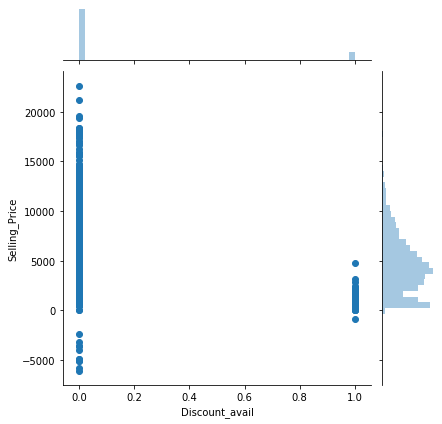

In [19]:
sns.jointplot(x='Discount_avail',y='Selling_Price',data=data)

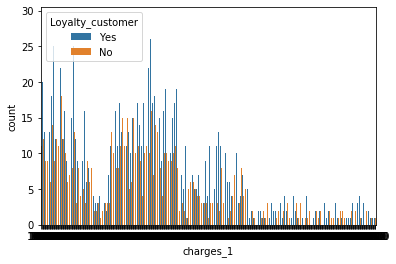

In [20]:
sns.countplot(x='charges_1',data=data,hue='Loyalty_customer')

In [21]:
df1['Product_Category'].unique()


array(['Fashion', 'Child_care', 'Educational', 'Repair', 'Technology',
       'Cosmetics', 'Hospitality', 'Organic', 'Pet_care', 'Home_decor'],
      dtype=object)

In [22]:
missing_values=data.isnull().sum()/data.shape[0]*100
print(missing_values)
# it show missing percentage in every index
print(type(missing_values))

Product_id          0.000000
Stall_no            0.078518
Market_Category     0.000000
Loyalty_customer    0.000000
Product_Category    0.000000
Grade               0.000000
Demand              0.000000
Discount_avail      0.596734
charges_1           3.109296
charges_2 (%)       3.219221
Minimum_price       0.596734
Maximum_price       5.386307
Selling_Price       0.643844
dtype: float64
<class 'pandas.core.series.Series'>


In [23]:
missing_index=missing_values[missing_values>1].keys()
print(missing_index)
#it is showing index having missing values greater than 1%


Index(['charges_1', 'charges_2 (%)', 'Maximum_price'], dtype='object')


In [24]:
df_drop=data.drop(columns=missing_index)
df_drop.columns
# this syntax is used drop columns having missing index greater than 1% 

Index(['Product_id', 'Stall_no', 'Market_Category', 'Loyalty_customer',
       'Product_Category', 'Grade', 'Demand', 'Discount_avail',
       'Minimum_price', 'Selling_Price'],
      dtype='object')

In [25]:
df_select_types=data.select_dtypes(include=['int64','float64'])
df_select_types.head(7)
#this synatax show how we can include datatype which we want 

Stall_no  Market_Category  Grade  Demand  Discount_avail  charges_1  \
0      37.0                2      1      68             0.0      376.0   
1      38.0               24      0      51             0.0      397.0   
2       9.0              447      0      10             0.0      250.0   
3      50.0               23      2      48             0.0      144.0   
4       7.0               63      1      35             1.0      211.0   
5      23.0              162      1      49             0.0      633.0   
6      33.0              462      3      57             0.0      263.0   

   charges_2 (%)  Minimum_price  Maximum_price  Selling_Price  
0           11.0         2983.0         4713.0    4185.947700  
1           12.0         7495.0        10352.0    9271.490256  
2            9.0         5752.0         7309.0    6785.701362  
3           13.0         5090.0        20814.0   13028.917824  
4            4.0         2430.0         9261.0     906.553935  
5            6.0         3959.0         6104.0    5631.247872  
6           13.0         2006.0         5257.0    3874.264992

In [26]:
print(data.Product_Category.unique())
#diferent unique value in category data
print(data.Product_Category.value_counts())
#this syntax prints diferrent unique value with  their frequency

['Fashion' 'Child_care' 'Educational' 'Repair' 'Technology' 'Cosmetics'
 'Hospitality' 'Organic' 'Pet_care' 'Home_decor']
Pet_care       682
Repair         676
Child_care     658
Cosmetics      649
Hospitality    632
Technology     620
Organic        620
Home_decor     617
Educational    610
Fashion        604
Name: Product_Category, dtype: int64


<IPython.core.display.Javascript object>

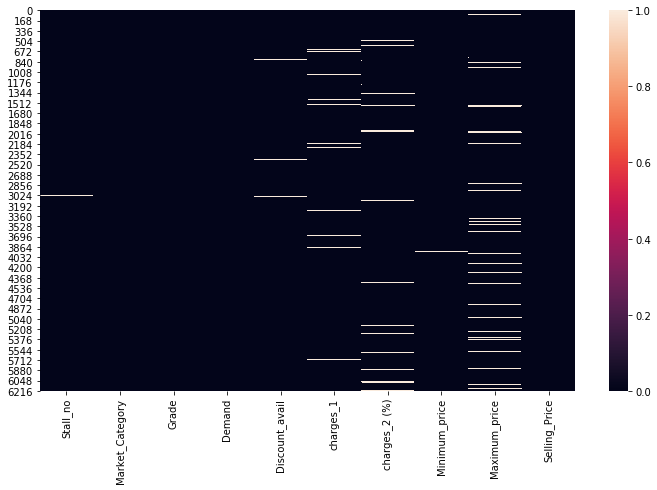

In [27]:
plt.figure(figsize=(12,7))
sns.heatmap(df_select_types.isnull())

In [28]:
df_select_types[df_select_types.isnull().any(axis=1)]
#this funtion is used to see only null in dataframe


Stall_no  Market_Category  Grade  Demand  Discount_avail  charges_1  \
16        14.0                1      0      74             0.0        NaN   
33        17.0              101      0      19             0.0        NaN   
36         5.0               14      0      61             0.0      323.0   
64         2.0              268      2      28             NaN      340.0   
76         7.0              358      3      31             0.0        NaN   
...        ...              ...    ...     ...             ...        ...   
6331      46.0               99      0      43             0.0      375.0   
6351      37.0              128      2      93             0.0      149.0   
6355      20.0               65      0      81             0.0      564.0   
6356      48.0               68      2      13             0.0      640.0   
6362      17.0              358      3       7             0.0      144.0   

      charges_2 (%)  Minimum_price  Maximum_price  Selling_Price  
16             11.0          786.0            NaN    2582.860500  
33              9.0          950.0         1580.0    1563.983586  
36             14.0         5682.0            NaN    7056.729900  
64              9.0          945.0         2956.0            NaN  
76              NaN         9483.0        13644.0   11761.213275  
...             ...            ...            ...            ...  
6331            NaN          579.0            NaN    1716.066432  
6351            NaN          753.0         2005.0    1506.134784  
6355           16.0         3669.0            NaN    5165.500032  
6356           12.0          910.0            NaN    2846.355336  
6362            9.0          487.0          855.0            NaN  

[798 rows x 10 columns]

In [29]:
missing_index2=[var for var in df_select_types.columns if df_select_types[var].isnull().sum()>0]
missing_index2
#columns name having missing values

['Stall_no',
 'Discount_avail',
 'charges_1',
 'charges_2 (%)',
 'Minimum_price',
 'Maximum_price',
 'Selling_Price']

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

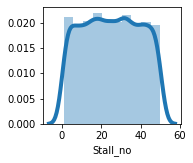

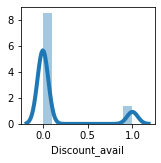

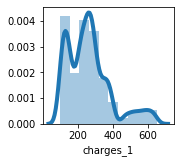

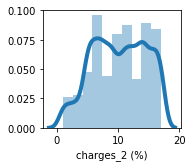

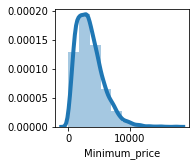

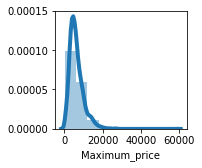

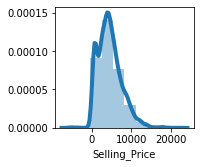

In [30]:
for i ,value in enumerate(missing_index2):
    plt.figure(figsize=(7,6))
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    sns.distplot(df_select_types[value].dropna(),bins=10,kde_kws={'linewidth':4})

In [31]:
df3_num_mean=df_select_types.fillna(df_select_types.mean())
#filled with mean
df_num_median=df_select_types.fillna(df_select_types.median())
#filled with median

# DATA DISTRIBUTION



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

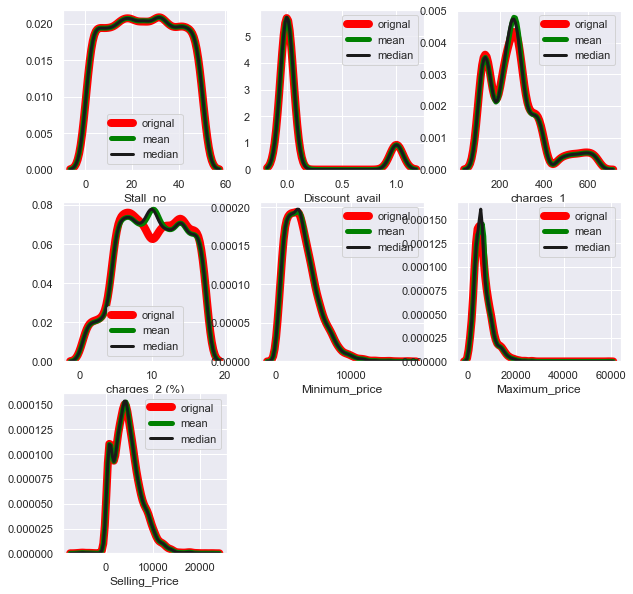

In [51]:
plt.figure(figsize=(10,10))
sns.set()
for i,val in enumerate (missing_index2):
    plt.subplot(3,3,i+1)
    sns.distplot(df_select_types[val].dropna(),bins=10,hist=False,kde_kws={'linewidth':8,'color':"red"},label='orignal')
    sns.distplot(df3_num_mean[val],bins=10,hist=False,kde_kws={'linewidth':5, 'color':'green'},label="mean")
    sns.distplot(df_num_median[val],bins=10,hist=False,kde_kws={'linewidth':3,'color':'k'},label='median')
    plt.legend()

In [53]:
data2=data.copy()
data2.update(df_num_median)


In [54]:
data2.isnull().sum()

Product_id          0
Stall_no            0
Market_Category     0
Loyalty_customer    0
Product_Category    0
Grade               0
Demand              0
Discount_avail      0
charges_1           0
charges_2 (%)       0
Minimum_price       0
Maximum_price       0
Selling_Price       0
dtype: int64